In [1]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adagrad
from __future__ import division

import numpy as np
import os


import cPickle as pickle


name = "targetSubsample.pickle"
with open(name, 'rb') as f:
    y = pickle.load(f)
    
name = "trainSubsample.pickle"
with open(name, 'rb') as f:
    X = pickle.load(f)

#Angry 1, 0, 0, 0
#Sad 0, 1, 0, 0
#Tense 0, 0, 1, 0
#Happy 0, 0, 0, 1

print y.shape
print X.shape

Using Theano backend.
Using gpu device 0: GeForce GTX 760 (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)
/home/laol/env/local/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


(2400, 4)
(2400, 128, 733)


In [15]:
w = 128
h = 733
nclasses = 4
samplesCount = 2400

In [3]:
nKernel = 10

model = Sequential()

model.add(Convolution2D( nKernel, 5, 128, border_mode='same', activation='relu', init='glorot_uniform', input_shape=(1, 128, 733)))
model.add(MaxPooling2D(pool_size = (1, 4)))
model.add(Convolution2D( 2 * nKernel, 5, 128, border_mode='valid', activation='relu', init='glorot_uniform'))
model.add(MaxPooling2D(pool_size = (2, 8)))

model.add(Flatten())

model.add(Dense(100, init='glorot_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, init='glorot_uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nclasses, init='glorot_uniform', activation='softmax'))

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

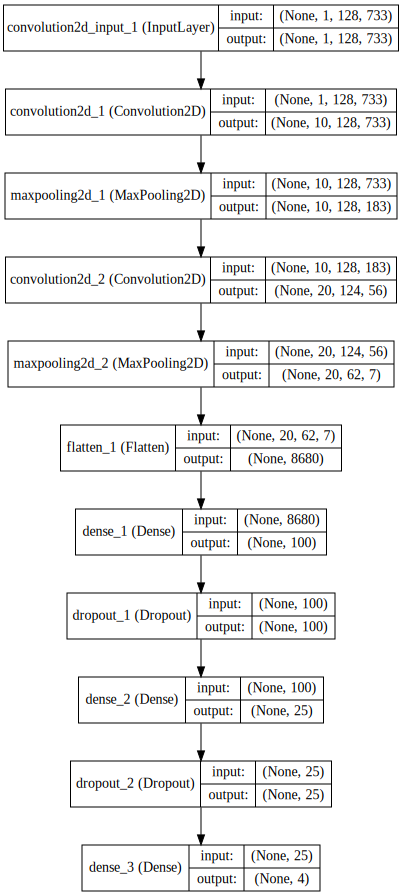

In [5]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [16]:
def shuffle(x, y, samplesCount):
    indexes = np.arange(samplesCount)
    np.random.shuffle(indexes)
    x_shuffeled = np.array(x)
    y_shuffeled = np.array(y)


    for i in range(len(x)):
        x_shuffeled[i] = x[indexes[i]]
        y_shuffeled[i] = y[indexes[i]]

    return x_shuffeled, y_shuffeled

In [17]:
X, y = shuffle(X, y, samplesCount)

In [24]:
countInTrain = 2200
model.fit(X.reshape(samplesCount, 1, 128, 733)[:countInTrain], y.reshape(samplesCount, 4)[:countInTrain],\
          batch_size=30, nb_epoch=10, validation_split=0.1, show_accuracy=True, shuffle=True, verbose=1)

Train on 1980 samples, validate on 220 samples
Epoch 1/10
1980/1980 [==============================] - 61s - loss: 1.3524 - acc: 0.3404 - val_loss: 1.3370 - val_acc: 0.3318
Epoch 2/10
1980/1980 [==============================] - 64s - loss: 1.3500 - acc: 0.3404 - val_loss: 1.3341 - val_acc: 0.3909
Epoch 3/10
1980/1980 [==============================] - 64s - loss: 1.3449 - acc: 0.3434 - val_loss: 1.3306 - val_acc: 0.4000
Epoch 4/10
1980/1980 [==============================] - 64s - loss: 1.3268 - acc: 0.3682 - val_loss: 1.2982 - val_acc: 0.4045
Epoch 5/10
1980/1980 [==============================] - 64s - loss: 1.3074 - acc: 0.3869 - val_loss: 1.2947 - val_acc: 0.3818
Epoch 6/10
1980/1980 [==============================] - 64s - loss: 1.3076 - acc: 0.3914 - val_loss: 1.2772 - val_acc: 0.4318
Epoch 7/10
1980/1980 [==============================] - 64s - loss: 1.2920 - acc: 0.3894 - val_loss: 1.2759 - val_acc: 0.3955
Epoch 8/10
1980/1980 [==============================] - 64s - loss: 1.2

In [28]:
countInTrain = 2200
model.fit(X.reshape(samplesCount, 1, 128, 733)[:countInTrain], y.reshape(samplesCount, 4)[:countInTrain],\
          batch_size=30, nb_epoch=10, validation_split=0.1, show_accuracy=True, shuffle=True, verbose=1)

Train on 1980 samples, validate on 220 samples
Epoch 1/10
1980/1980 [==============================] - 62s - loss: 1.2441 - acc: 0.4434 - val_loss: 1.2535 - val_acc: 0.4682
Epoch 2/10
1980/1980 [==============================] - 64s - loss: 1.2228 - acc: 0.4495 - val_loss: 1.2238 - val_acc: 0.4773
Epoch 3/10
1980/1980 [==============================] - 64s - loss: 1.2113 - acc: 0.4697 - val_loss: 1.2438 - val_acc: 0.4545
Epoch 4/10
1980/1980 [==============================] - 64s - loss: 1.2084 - acc: 0.4687 - val_loss: 1.2188 - val_acc: 0.4591
Epoch 5/10
1980/1980 [==============================] - 64s - loss: 1.1755 - acc: 0.4899 - val_loss: 1.1961 - val_acc: 0.4955
Epoch 6/10
1980/1980 [==============================] - 64s - loss: 1.1683 - acc: 0.4929 - val_loss: 1.2063 - val_acc: 0.4682
Epoch 7/10
1980/1980 [==============================] - 64s - loss: 1.1646 - acc: 0.4778 - val_loss: 1.1805 - val_acc: 0.4682
Epoch 8/10
1980/1980 [==============================] - 64s - loss: 1.1

In [91]:
countInTrain = 2200
model.fit(X.reshape(samplesCount, 1, 128, 733)[:countInTrain], y.reshape(samplesCount, 4)[:countInTrain],\
          batch_size=30, nb_epoch=500, validation_split=0.1, show_accuracy=True, shuffle=True, verbose=1)

Train on 1980 samples, validate on 220 samples
Epoch 1/500
1980/1980 [==============================] - 61s - loss: 1.0718 - acc: 0.5465 - val_loss: 1.1550 - val_acc: 0.5227
Epoch 2/500
1980/1980 [==============================] - 62s - loss: 1.0724 - acc: 0.5434 - val_loss: 1.1474 - val_acc: 0.5091
Epoch 3/500
1980/1980 [==============================] - 64s - loss: 1.0600 - acc: 0.5470 - val_loss: 1.1346 - val_acc: 0.5273
Epoch 4/500
1980/1980 [==============================] - 64s - loss: 1.0399 - acc: 0.5641 - val_loss: 1.1317 - val_acc: 0.5091
Epoch 5/500
1980/1980 [==============================] - 64s - loss: 1.0190 - acc: 0.5884 - val_loss: 1.0887 - val_acc: 0.5409
Epoch 6/500
1980/1980 [==============================] - 64s - loss: 1.0080 - acc: 0.5737 - val_loss: 1.1141 - val_acc: 0.5455
Epoch 7/500
1980/1980 [==============================] - 64s - loss: 0.9824 - acc: 0.5869 - val_loss: 1.1175 - val_acc: 0.5182
Epoch 8/500
1980/1980 [==============================] - 64s - l

In [48]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f, -1)

In [64]:
def SetMaxProbabilityToOne(array):
    return map(lambda x: 1 if(x == max(array)) else 0, array)


def GetAccuracy(X_test, y_test, model):
    predict = model.predict(X_test.reshape(len(X_test), 1, 128, 733))
    countTrue = 0
    for i in range(len(predict)):
        predict[i] = SetMaxProbabilityToOne(predict[i])
        countTrue += 1 if (sum(predict[i] == y_test[i]) == nclasses) else 0
    print countTrue / len(predict)

In [65]:
yValidation = y[countInTrain:samplesCount]
XValidation = X[countInTrain:samplesCount]

GetAccuracy(XValidation, yValidation, model)

0.545


In [87]:
nKernel = 10

model2 = Sequential()

model2.add(Convolution2D( nKernel, 3, 20, border_mode='same', activation='relu', init='glorot_uniform', input_shape=(1, 128, 733)))
model2.add(MaxPooling2D(pool_size = (3, 4)))
model2.add(Dropout(0.4))
model2.add(Convolution2D( 2 * nKernel, 3, 20, border_mode='valid', activation='relu', init='glorot_uniform'))
model2.add(MaxPooling2D(pool_size = (2, 8)))

model2.add(Flatten())

model2.add(Dense(50, init='glorot_uniform', activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(15, init='glorot_uniform', activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(nclasses, init='glorot_uniform', activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

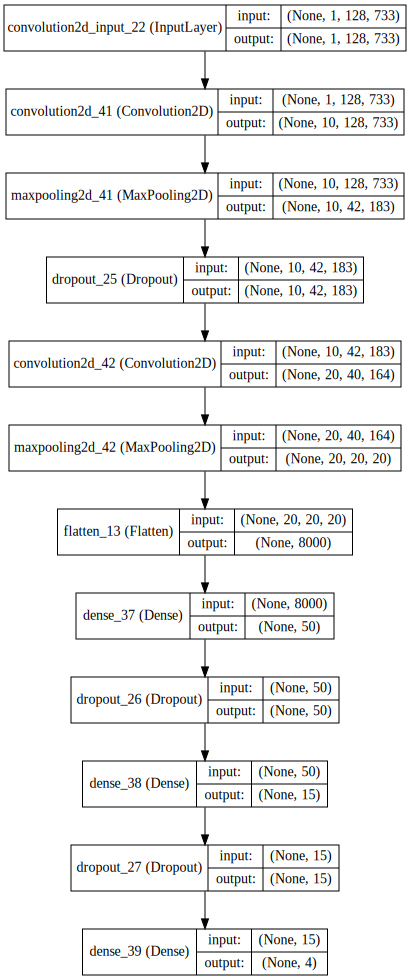

In [88]:
SVG(model_to_dot(model2, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [89]:
countInTrain = 2200
model2.fit(X.reshape(samplesCount, 1, 128, 733)[:countInTrain], y.reshape(samplesCount, 4)[:countInTrain],\
          batch_size=30, nb_epoch=50, validation_split=0.1, show_accuracy=True, shuffle=True, verbose=1)

Train on 1980 samples, validate on 220 samples
Epoch 1/50
1980/1980 [==============================] - 14s - loss: 1.3797 - acc: 0.2727 - val_loss: 1.3780 - val_acc: 0.3182
Epoch 2/50
1980/1980 [==============================] - 14s - loss: 1.3765 - acc: 0.2773 - val_loss: 1.3765 - val_acc: 0.2909
Epoch 3/50
1980/1980 [==============================] - 14s - loss: 1.3739 - acc: 0.2879 - val_loss: 1.3757 - val_acc: 0.2773
Epoch 4/50
1980/1980 [==============================] - 14s - loss: 1.3607 - acc: 0.3212 - val_loss: 1.3682 - val_acc: 0.2818
Epoch 5/50
1980/1980 [==============================] - 14s - loss: 1.3606 - acc: 0.3162 - val_loss: 1.3754 - val_acc: 0.2773
Epoch 6/50
1980/1980 [==============================] - 14s - loss: 1.3559 - acc: 0.3338 - val_loss: 1.3732 - val_acc: 0.3000
Epoch 7/50
1980/1980 [==============================] - 14s - loss: 1.3525 - acc: 0.3323 - val_loss: 1.3613 - val_acc: 0.3091
Epoch 8/50
1980/1980 [==============================] - 14s - loss: 1.3

In [90]:
countInTrain = 2200
model2.fit(X.reshape(samplesCount, 1, 128, 733)[:countInTrain], y.reshape(samplesCount, 4)[:countInTrain],\
          batch_size=30, nb_epoch=50, validation_split=0.1, show_accuracy=True, shuffle=True, verbose=1)

Train on 1980 samples, validate on 220 samples
Epoch 1/50
1980/1980 [==============================] - 14s - loss: 1.1799 - acc: 0.4662 - val_loss: 1.2788 - val_acc: 0.4227
Epoch 2/50
1980/1980 [==============================] - 14s - loss: 1.1738 - acc: 0.4843 - val_loss: 1.2482 - val_acc: 0.4727
Epoch 3/50
1980/1980 [==============================] - 14s - loss: 1.1796 - acc: 0.4596 - val_loss: 1.2731 - val_acc: 0.4455
Epoch 4/50
1980/1980 [==============================] - 14s - loss: 1.1734 - acc: 0.4697 - val_loss: 1.2339 - val_acc: 0.4636
Epoch 5/50
1980/1980 [==============================] - 14s - loss: 1.1726 - acc: 0.4525 - val_loss: 1.2323 - val_acc: 0.4455
Epoch 6/50
1980/1980 [==============================] - 14s - loss: 1.1701 - acc: 0.4838 - val_loss: 1.2347 - val_acc: 0.5000
Epoch 7/50
1980/1980 [==============================] - 14s - loss: 1.1437 - acc: 0.4919 - val_loss: 1.2633 - val_acc: 0.4636
Epoch 8/50
1980/1980 [==============================] - 14s - loss: 1.1

In [71]:
yValidation = y[countInTrain:samplesCount]
XValidation = X[countInTrain:samplesCount]

GetAccuracy(XValidation, yValidation, model2)

0.38


In [80]:
nKernel = 10

model3 = Sequential()

model3.add(Convolution2D( nKernel, 5, 5, border_mode='same', activation='relu', init='glorot_uniform', input_shape=(1, 128, 733)))
model3.add(MaxPooling2D(pool_size = (3, 4)))
model3.add(Convolution2D( 2 * nKernel, 3, 3, border_mode='valid', activation='relu', init='glorot_uniform'))
model3.add(MaxPooling2D(pool_size = (8, 8)))

model3.add(Flatten())

model3.add(Dense(200, init='glorot_uniform', activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(100, init='glorot_uniform', activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(nclasses, init='glorot_uniform', activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

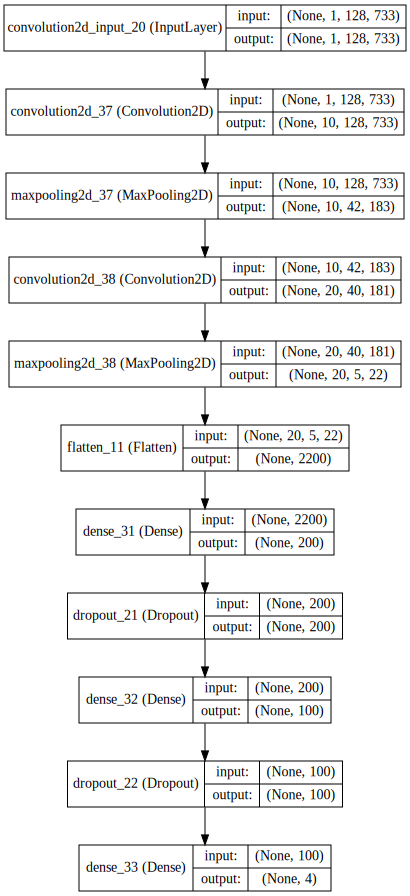

In [81]:
SVG(model_to_dot(model3, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [83]:
countInTrain = 2200
model3.fit(X.reshape(samplesCount, 1, 128, 733)[:countInTrain], y.reshape(samplesCount, 4)[:countInTrain],\
          batch_size=30, nb_epoch=100, validation_split=0.1, show_accuracy=True, shuffle=True, verbose=1)

Train on 1980 samples, validate on 220 samples
Epoch 1/100
1980/1980 [==============================] - 4s - loss: 1.3417 - acc: 0.3480 - val_loss: 1.3390 - val_acc: 0.3409
Epoch 2/100
1980/1980 [==============================] - 4s - loss: 1.3341 - acc: 0.3657 - val_loss: 1.3308 - val_acc: 0.3455
Epoch 3/100
1980/1980 [==============================] - 4s - loss: 1.3340 - acc: 0.3465 - val_loss: 1.3341 - val_acc: 0.3455
Epoch 4/100
1980/1980 [==============================] - 4s - loss: 1.3286 - acc: 0.3581 - val_loss: 1.3309 - val_acc: 0.3364
Epoch 5/100
1980/1980 [==============================] - 4s - loss: 1.3338 - acc: 0.3596 - val_loss: 1.3336 - val_acc: 0.3364
Epoch 6/100
1980/1980 [==============================] - 4s - loss: 1.3347 - acc: 0.3652 - val_loss: 1.3309 - val_acc: 0.3318
Epoch 7/100
1980/1980 [==============================] - 4s - loss: 1.3192 - acc: 0.3742 - val_loss: 1.3215 - val_acc: 0.4000
Epoch 8/100
1980/1980 [==============================] - 4s - loss: 1.3

In [84]:
yValidation = y[countInTrain:samplesCount]
XValidation = X[countInTrain:samplesCount]

GetAccuracy(XValidation, yValidation, model3)

0.515
